<a href="https://colab.research.google.com/github/lelesgaray/covid-analysis/blob/master/covid_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#import pandas_profiling # doesn't seem to work :(
%matplotlib inline
# !pip install sidetable
import sidetable

In [3]:
# database import
df = pd.read_csv('https://raw.githubusercontent.com/nikkisharma536/streamlit_app/master/covid.csv')
df.head()

,Country,Latitude,Longitude,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
0,Argentina,-34.0,-64.0,9/4/2020,1795,80,65,5,39.716,1.770,1.438,0.111,14850,1520,0.329,0.034
1,Argentina,-34.0,-64.0,10/4/2020,1894,99,79,14,41.907,2.190,1.748,0.310,16379,1529,0.362,0.034
2,Argentina,-34.0,-64.0,11/4/2020,1975,81,82,3,43.699,1.792,1.814,0.066,18027,1648,0.399,0.036
3,Argentina,-34.0,-64.0,14/4/2020,2272,69,98,3,50.270,1.527,2.168,0.066,22805,3047,0.505,0.067
4,Argentina,-34.0,-64.0,15/4/2020,2432,160,105,7,53.810,3.540,2.323,0.155,24374,1569,0.539,0.035


In [4]:
df.shape

(3369, 16)

In [5]:
# check NaNs and variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3369 entries, 0 to 3368
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   3369 non-null   object 
 1   Latitude                  3369 non-null   float64
 2   Longitude                 3369 non-null   float64
 3   date                      3369 non-null   object 
 4   total_cases               3369 non-null   int64  
 5   new_cases                 3369 non-null   int64  
 6   total_deaths              3369 non-null   int64  
 7   new_deaths                3369 non-null   int64  
 8   total_cases_per_million   3369 non-null   float64
 9   new_cases_per_million     3369 non-null   float64
 10  total_deaths_per_million  3369 non-null   float64
 11  new_deaths_per_million    3369 non-null   float64
 12  total_tests               3369 non-null   int64  
 13  new_tests                 3369 non-null   int64  
 14  total_te

In [6]:
# Useful to check categories of string variables

for i in df:
  if df[i].dtype == 'O':
    print(i)
    print(df[i].value_counts(normalize = True))

Country
Mexico                0.032947
United Kingdom        0.028495
Switzerland           0.028495
Korea, Republic of    0.026714
South Korea           0.026714
                        ...   
Philippines           0.002375
Ukraine               0.001781
Netherlands           0.000890
Ghana                 0.000890
Nigeria               0.000594
Name: Country, Length: 80, dtype: float64
date
15/4/2020    0.022262
10/4/2020    0.021371
14/4/2020    0.021075
24/4/2020    0.021075
27/4/2020    0.021075
               ...   
4/1/2020     0.000297
23/1/2020    0.000297
2/1/2020     0.000297
3/1/2020     0.000297
5/1/2020     0.000297
Name: date, Length: 121, dtype: float64


In [7]:
# Another way to check caegories with sidetable
df.stb.freq(['Country'], style = True)

,Country,count,percent,cumulative_count,cumulative_percent
0,Mexico,111,3.29%,111,3.29%
1,United Kingdom,96,2.85%,207,6.14%
2,Switzerland,96,2.85%,303,8.99%
3,South Korea,90,2.67%,393,11.67%
4,"Korea, Republic of",90,2.67%,483,14.34%
5,Czech Republic,82,2.43%,565,16.77%
6,Italy,66,1.96%,631,18.73%
7,Israel,64,1.90%,695,20.63%
8,Iceland,63,1.87%,758,22.50%
9,Austria,62,1.84%,820,24.34%


### Univariate Analysis


In [8]:
# Main statistics for each variable
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Latitude,Longitude,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
count,3369.000000,3369.000000,3.369000e+03,3369.000000,3369.000000,3369.000000,3369.000000,3369.000000,3369.000000,3369.000000,3.369000e+03,3369.00000,3369.000000,3369.000000
mean,29.208394,20.753368,1.276253e+04,650.169486,744.108934,42.291481,399.745923,16.477157,15.713140,0.838078,1.440244e+05,7546.93084,6.510466,0.295393
std,26.302528,67.013009,6.407711e+04,2986.753577,3993.727217,228.404876,841.132874,32.323331,55.385546,2.863833,4.469812e+05,23076.55187,13.686407,0.533546
min,-41.000000,-102.000000,0.000000e+00,-105.000000,0.000000,0.000000,0.000000,-38.570000,0.000000,0.000000,2.000000e+00,0.00000,0.000000,0.000000
10%,-17.000000,-80.000000,1.600000e+01,0.000000,0.000000,0.000000,0.511200,0.000000,0.000000,0.000000,7.940000e+02,76.00000,0.032000,0.003000
25%,15.000000,-8.000000,1.350000e+02,7.000000,1.000000,0.000000,5.419000,0.386000,0.026000,0.000000,4.919000e+03,401.00000,0.191000,0.017000
50%,37.000000,20.000000,9.770000e+02,49.000000,12.000000,1.000000,61.852000,3.114000,0.858000,0.031000,2.482500e+04,1420.00000,1.349000,0.092000
75%,48.666700,68.000000,5.448000e+03,240.000000,115.000000,7.000000,350.807000,17.751000,5.448000,0.415000,9.338700e+04,5015.00000,7.319000,0.388000
90%,59.000000,121.000000,1.488500e+04,952.400000,501.600000,37.000000,1198.851000,49.031000,29.567800,1.838600,3.123306e+05,12345.80000,18.305200,0.780000
max,65.000000,174.000000,1.012583e+06,48529.000000,58355.000000,4928.000000,5976.267000,332.169000,621.850000,65.094000,6.024625e+06,314182.00000,141.749000,7.285000


In [9]:
# Count missing values
df.isnull().sum()

Country                     0
Latitude                    0
Longitude                   0
date                        0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
new_cases_per_million       0
total_deaths_per_million    0
new_deaths_per_million      0
total_tests                 0
new_tests                   0
total_tests_per_thousand    0
new_tests_per_thousand      0
dtype: int64

In [10]:
# Other way of counting missing data
df.stb.missing()

,missing,total,percent
Country,0,3369,0.0
Latitude,0,3369,0.0
Longitude,0,3369,0.0
date,0,3369,0.0
total_cases,0,3369,0.0
new_cases,0,3369,0.0
total_deaths,0,3369,0.0
new_deaths,0,3369,0.0
total_cases_per_million,0,3369,0.0
new_cases_per_million,0,3369,0.0


In [11]:
# show cases by country (top 10 by total cases)
df[['total_cases', 'Country', 'total_deaths_per_million']].groupby(df['Country']).mean().sort_values('total_cases', ascending = False).head(10)

,total_cases,total_deaths_per_million
Country,,
United States,350565.075472,49.097472
Italy,89933.757576,183.665348
"Iran, Islamic Republic of",79565.750000,59.312375
Turkey,47384.744186,13.073256
Netherlands,38168.666667,263.770000
United Kingdom,31276.125000,58.270469
Canada,21817.829268,23.700000
Russia,20618.700000,1.243040
Russian Federation,20618.700000,1.243040


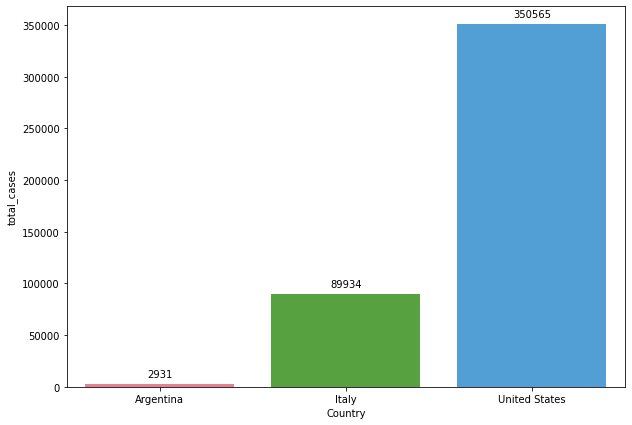

In [12]:
# simple bar plot of total cases

df2 = df[['total_cases', 'Country']].groupby(df['Country']).mean().reset_index()
df2 = df2.loc[(df2['Country'] == 'United States') | (df2['Country'] == 'Italy') | (df2['Country'] == 'Argentina'), :]
fig, ax = plt.subplots(figsize = (10, 7))
g = sns.barplot(x = df2['Country'], y = df2['total_cases'],palette="husl")

for p in g.patches:
  g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

total_cases


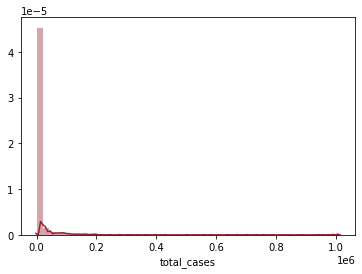

total_deaths_per_million


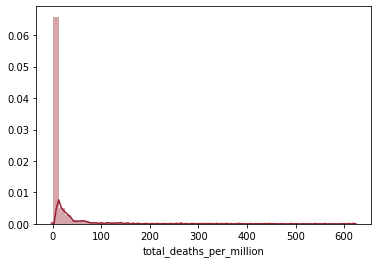

''

In [13]:
# Distribution plots

variables = df[['total_cases', 'total_deaths_per_million']] # <---- add variable names to plot

for i in variables:
  print(i)
  sns.distplot( variables[i], color='#981E32')
  plt.show()
;

In [14]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


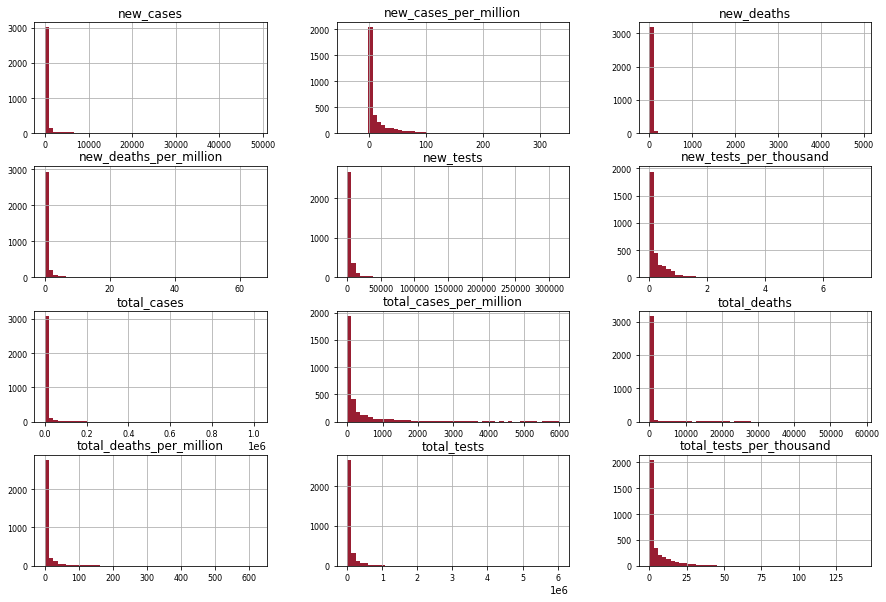

In [15]:
#fig, ax = plt.subplots(figsize = (20, 20))
df_num.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8, color='#981E32');

### Bivariate Analysis


In [16]:
# Correlation matrix
df.corr()

,Latitude,Longitude,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
Latitude,1.000000,0.089749,0.081487,0.093377,0.090923,0.091698,0.274859,0.252413,0.172666,0.179699,0.147749,0.160615,0.261971,0.286865
Longitude,0.089749,1.000000,-0.146633,-0.171070,-0.131161,-0.157698,-0.115787,-0.138377,-0.085818,-0.109104,0.012181,-0.013799,0.006016,-0.003720
total_cases,0.081487,-0.146633,1.000000,0.867035,0.914051,0.832509,0.303818,0.282857,0.378303,0.322516,0.843609,0.751961,0.082193,0.088663
new_cases,0.093377,-0.171070,0.867035,1.000000,0.697663,0.818140,0.213442,0.328993,0.235095,0.291707,0.760259,0.794282,0.039530,0.073684
total_deaths,0.090923,-0.131161,0.914051,0.697663,1.000000,0.800787,0.370806,0.285418,0.615247,0.464636,0.738724,0.618830,0.091295,0.090737
new_deaths,0.091698,-0.157698,0.832509,0.818140,0.800787,1.000000,0.275724,0.317378,0.416850,0.565476,0.647340,0.615783,0.044297,0.063559
total_cases_per_million,0.274859,-0.115787,0.303818,0.213442,0.370806,0.275724,1.000000,0.601325,0.614433,0.465388,0.259611,0.194993,0.803241,0.598487
new_cases_per_million,0.252413,-0.138377,0.282857,0.328993,0.285418,0.317378,0.601325,1.000000,0.367048,0.458392,0.240605,0.248231,0.388582,0.529706
total_deaths_per_million,0.172666,-0.085818,0.378303,0.235095,0.615247,0.416850,0.614433,0.367048,1.000000,0.750945,0.305875,0.230504,0.239912,0.185549
new_deaths_per_million,0.179699,-0.109104,0.322516,0.291707,0.464636,0.565476,0.465388,0.458392,0.750945,1.000000,0.229015,0.210562,0.139486,0.144979


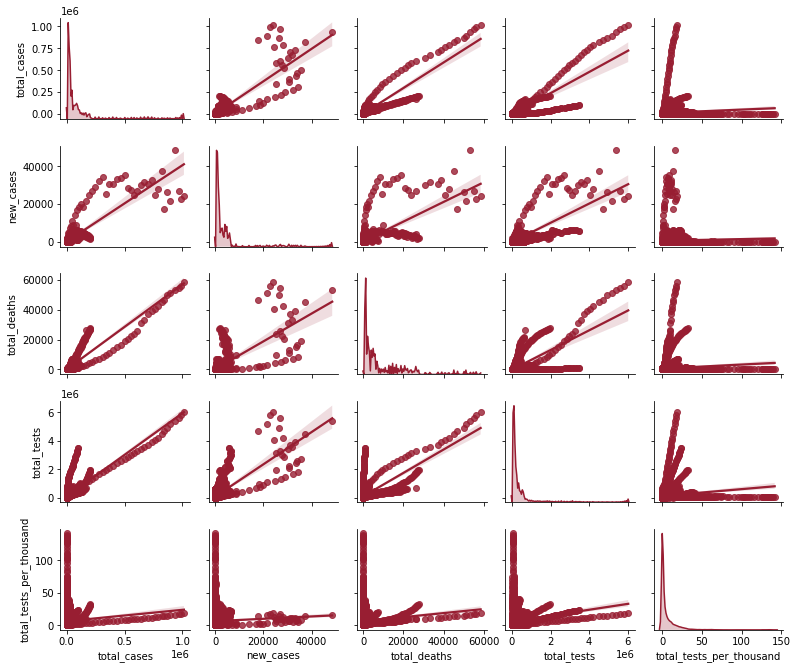

In [17]:
# Bivariate analysis (plot)
df_new = df.loc[ :, ['total_cases', 'new_cases','total_deaths', 'total_tests', 'total_tests_per_thousand' ] ]
pp = sns.pairplot(df_new,
             height=1.8, aspect=1.2, kind = 'reg',
                  plot_kws=dict(color = "#981E32"),
                  diag_kws=dict(shade=True, color = "#981E32"),
                  diag_kind="kde",
                  palette="husl")

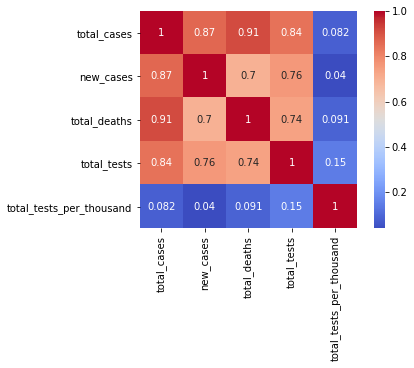

In [18]:
# Heatmap plot
sns.heatmap(df_new.corr(),
            cmap="coolwarm",
                 annot=True, square = True)

#### Other plots

In [19]:
# Interactive plot with plotly - Total cases

import plotly.graph_objects as go


df_plot = pd.read_csv('https://raw.githubusercontent.com/nikkisharma536/streamlit_app/master/covid.csv')
df_plot.head()
df_plot = df_plot[['total_cases', 'Country', 'Latitude', 'Longitude','total_deaths_per_million' ]].groupby(df_plot['Country']).mean().reset_index()

df_plot['text'] = df_plot['Country'] + '<br>Cases: ' + (df_plot['total_cases'].astype('int')).astype(str) + '<br>Total Deaths per million: ' + (df_plot['total_deaths_per_million'].astype('int')).astype(str) 
#limits = [(0,9999),(5000,19999),(1500,29999),(2500,39999),(3500,100000)]
colors = "#981E32"
cities = []
scale = 200

fig = go.Figure()


fig.add_trace(go.Scattergeo(
        locationmode = 'country names',
        lon = df_plot['Longitude'],
        lat = df_plot['Latitude'],
        text = df_plot['text'],
        mode = 'markers',
        marker = dict(
            size = df_plot['total_cases']/scale,
            color = "#981E32",
            line_color='rgb(200,200,200)',
            line_width=0.5,
            sizemode = 'area' )))
       


fig.update_layout(
        title_text = 'SARS-COV-2 cases by country',
        showlegend = False,
        mapbox_style="open-street-map",
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(220, 220, 220)',
        )
    )

fig.show()

In [20]:
# get last date
pd.to_datetime(df['date']).max()

Timestamp('2020-12-04 00:00:00')

In [21]:
# Interactive box plot 

import plotly.offline as py 
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tl

df_plot = df[['new_cases', 'Country', 'total_deaths' ]]
df_plot = df_plot.loc[(df_plot['Country'] == 'Chile') | (df_plot['Country'] == 'Ecuador') | (df_plot['Country'] == 'Argentina'), :]

trace0 = go.Box(
    y=df_plot["new_cases"],
    x=df_plot['Country'],
    name='New Cases',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_plot['total_deaths'],
    x=df_plot['Country'],
    name='Total deaths',
    marker=dict(
        color='#981E32'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='# people'
    ),
    boxmode='group',
    title = 'New cases and deaths distribution by country'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [22]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_plot['Country'],
            "y": df_plot["new_cases"],
            "legendgroup": 'New Cases',
            "scalegroup": 'No',
            "name": 'New Cases',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#3D9970'
            }
        },
        {
            "type": 'violin',
            "x": df_plot['Country'],
            "y": df_plot['total_deaths'],
            "legendgroup": 'Total Deaths',
            "scalegroup": 'No',
            "name": 'Total Deaths',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#981E32'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'covid_violin_plot', validate = False)

In [23]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df.loc[df['Country'] == 'Argentina', 'total_cases'])
x2 = np.log(df.loc[df['Country'] == 'Chile', 'total_cases'] )

# Group data together
hist_data = [x1, x2]

group_labels = ['Argentina', 'Chile']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1, curve_type='normal')

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [24]:
df_plot = df[['new_cases', 'Country', 'total_deaths' ]]
df_plot = df_plot.loc[(df_plot['Country'] == 'Chile') | (df_plot['Country'] == 'Ecuador') | (df_plot['Country'] == 'Argentina'), :]

trace0 = go.Bar(
            x = df_plot['Country'].value_counts().index.values,
            y = df_plot['new_cases'].values,
            name='New Cases'
    )

trace1 = go.Bar(
            x = df_plot['Country'].value_counts().index.values,
            y = df_plot['total_deaths'].values,
            name='Total Deaths'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Country'
    ),
    title='Number of new cases/deaths by country'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

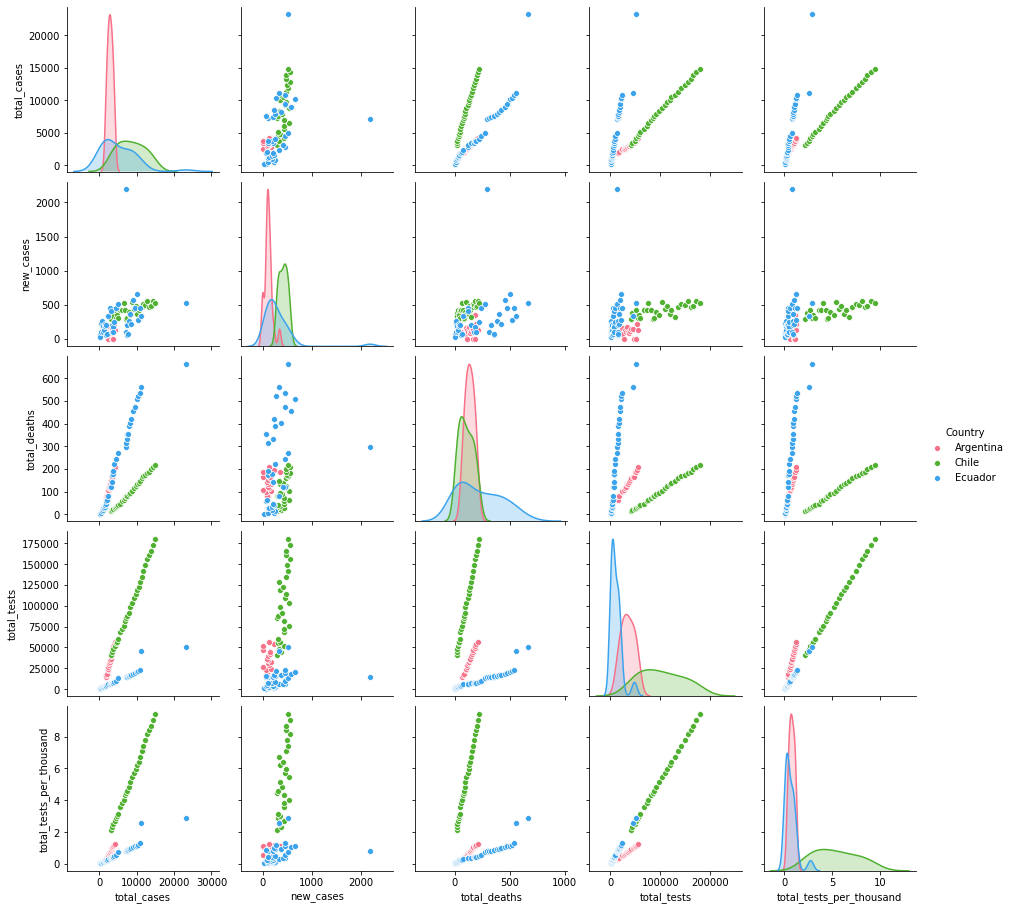

In [25]:
# Bivariate analysis with hue (plot)

df_new = df.loc[ :, ['total_cases', 'new_cases','total_deaths', 'total_tests', 'total_tests_per_thousand' , 'Country'] ]
df_new = df_new.loc[(df_new['Country'] == 'Chile') | (df_new['Country'] == 'Ecuador') | (df_new['Country'] == 'Argentina'), :]


pp = sns.pairplot(df_new, hue = 'Country',
             
                  palette="husl")

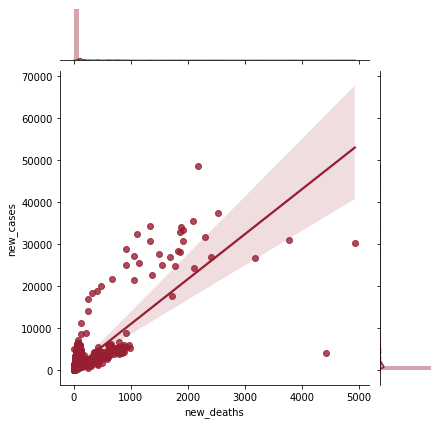

In [26]:
# joint plot
sns.jointplot('new_deaths', 'new_cases', data = df, kind = 'reg',
              color = "#981E32")